In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plot
%matplotlib inline

In [5]:
Traindata = pd.read_csv("faultdataset.csv")
Traindata

,LightIntensity,Temperature,GasLevel,FireDetected,GasLeakDetected,OverheatCondition,NormalConditions
0,1024,30,30,0,0,0,1
1,1024,28,28,0,0,0,1
2,1024,32,29,0,0,0,1
3,1024,34,31,0,0,0,1
4,1024,30,32,0,0,0,1
...,...,...,...,...,...,...,...
127,810,33,39,0,1,0,0
128,830,32,37,0,1,0,0
129,840,31,36,0,1,0,0
130,815,30,35,0,1,0,0


In [6]:
Testdata = pd.read_csv("faultdatasettest.csv")
Testdata

,LightIntensity,Temperature,GasLevel,FireDetected,GasLeakDetected,OverheatCondition,NormalConditions
0,1024,30,30,0,0,0,1
1,545,45,20,1,0,0,0
2,937,33,37,0,1,0,0
3,1017,40,20,0,0,1,0
4,1020,29,28,0,0,0,1
5,598,48,25,1,0,0,0
6,936,32,39,0,1,0,0
7,1000,42,34,0,0,1,0
8,686,50,38,1,0,0,0
9,937,33,37,0,1,0,0


In [7]:
Traindata.describe()

,LightIntensity,Temperature,GasLevel,FireDetected,GasLeakDetected,OverheatCondition,NormalConditions
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,788.060606,36.045455,32.196970,0.340909,0.106061,0.151515,0.401515
std,301.971961,7.088173,4.673197,0.475821,0.309088,0.359916,0.492072
min,50.000000,22.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,689.000000,30.000000,29.000000,0.000000,0.000000,0.000000,0.000000
50%,932.500000,33.500000,32.000000,0.000000,0.000000,0.000000,0.000000
75%,1024.000000,42.000000,36.000000,1.000000,0.000000,0.000000,1.000000
max,1024.000000,50.000000,42.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
Testdata.describe()

,LightIntensity,Temperature,GasLevel,FireDetected,GasLeakDetected,OverheatCondition,NormalConditions
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,906.162791,35.837209,31.511628,0.255814,0.255814,0.255814,0.232558
std,155.396257,6.047157,7.455813,0.441481,0.441481,0.441481,0.427463
min,545.000000,28.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,825.000000,31.000000,25.000000,0.000000,0.000000,0.000000,0.000000
50%,970.000000,33.000000,34.000000,0.000000,0.000000,0.000000,0.000000
75%,1017.000000,40.000000,38.000000,0.500000,0.500000,0.500000,0.000000
max,1024.000000,50.000000,40.000000,1.000000,1.000000,1.000000,1.000000


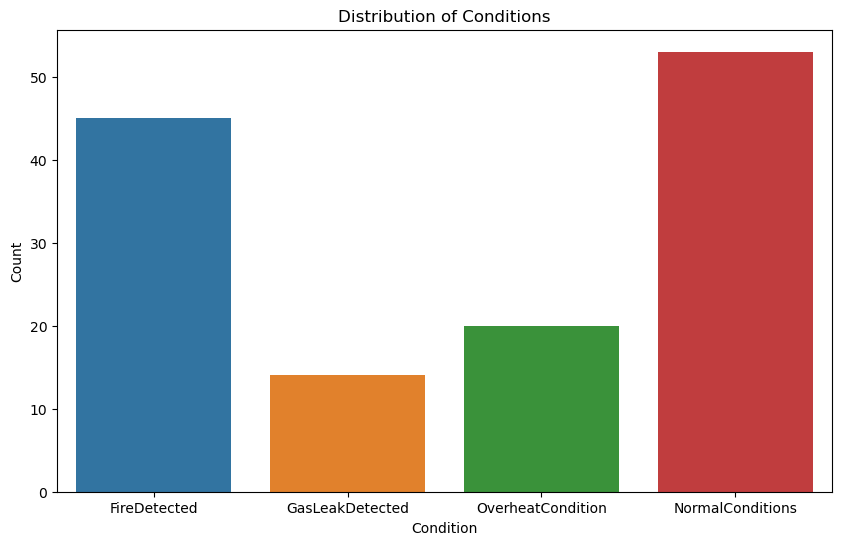

In [9]:
target_columns = ['FireDetected', 'GasLeakDetected', 'OverheatCondition', 'NormalConditions']
condition_counts = Traindata[target_columns].sum()
plot.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values)
plot.title('Distribution of Conditions')
plot.xlabel('Condition')
plot.ylabel('Count')
plot.show()

In [10]:
feature_columns = ['LightIntensity', 'Temperature', 'GasLevel']

In [11]:
Traindata['target'] = Traindata[target_columns].idxmax(axis=1)
Testdata['target'] = Testdata[target_columns].idxmax(axis=1)

In [12]:
xtrain = Traindata[feature_columns]
ytrain = Traindata['target']
xtest = Testdata[feature_columns]
ytest = Testdata['target']

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [14]:
ypred = rf_classifier.predict(xtest)
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

                   precision    recall  f1-score   support

     FireDetected       1.00      1.00      1.00        11
  GasLeakDetected       1.00      1.00      1.00        11
 NormalConditions       1.00      1.00      1.00        10
OverheatCondition       1.00      1.00      1.00        11

         accuracy                           1.00        43
        macro avg       1.00      1.00      1.00        43
     weighted avg       1.00      1.00      1.00        43

[[11  0  0  0]
 [ 0 11  0  0]
 [ 0  0 10  0]
 [ 0  0  0 11]]


In [15]:
acc=accuracy_score(ypred,ytest)
acc

1.0